# Comparing and combining TESS data with Kepler data

## Learning Goals

By the end of this tutorial you will:

- Have received a small introduction into AstroPy Quantity Tables
- Found a way to access an exoplanet database table within Python
- Be able to combine data from the TESS and Kepler space telescopes
- Understand the relevance of statistical errors and uncertainties

## Introduction

In 2009 the Kepler space telescope was launched and for nearly five years this space telescope had a fixed field of view of the night sky between the star Deneb of the constellation Cygnus and the star Vega of the constellation Lyra. Due to reaction wheel problems in 2013, the Kepler space telescope could no longer be pointed accurately in that position anymore. So instead the space telescope received the new K2 "Second Light" mission, which was about observing multiple locations on the ecliptic plane until 2016. In 2018 NASA finally declared that the Kepler space telescope had run out of fuel after thousands of exoplanets had been discovered with this phenomenal space telescope.

The Transiting Exoplanet Survey Satellite (TESS) space telescope was launched that same year (2018), which observes part of the sky with its wide-field-of-view cameras for only 27.5 days and then changes orientation for another observation of 27.5 days. With this iterative process the TESS space telescope is scanning nearly an entire hemisphere every year. After having observed the southern hemisphere in 2018, the TESS space telescope revisited the initial Kepler field in Sector (the night sky area observed for 27.5 days by TESS) 14, 15, and 26 in 2019, plus Sector 40 and 41 more recently in 2021. In these Sectors the TESS space telescope observed the same stars in the northern hemisphere as the Kepler space telescope had observed a decade ago.  

<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/evHF_mnIdj4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>  


This tutorial is going to explore how the observational TESS data compares with the observational Kepler data and how those two different observational data sets can be combined.

## Imports

This tutorial uses a couple of [**AstroPy**](http://docs.astropy.org/) packages, which are already part of the [**Lightkurve**](http://docs.lightkurve.org/) application, therefore no extra downloads/installations should be required if the Lightkurve installation process has already been completed.

In [1]:
from astropy.table import QTable
from astropy import units as u
from astropy.units import cds
import lightkurve as lk

/home/w/Documents/Exoplanets/Fork/lightkurve/src/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/w/.lightkurve/cache. Please move all the files in the legacy directory /home/w/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


The following code line below is just required to make the graphs work for the website, so there is no need to blindly copy this line of code.

In [2]:
%matplotlib inline

## 1. Candidate exoplanet search

There are multiple exoplanet databases, but the one this tutorial will use, is from the [**The Extrasolar Planets Encyclopaedia**](http://exoplanet.eu/), whose Virtual Observatory (vo) table can conveniently be downloaded with the [`.read`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.read) function into an [**AstroPy**](http://docs.astropy.org/) Quantity Table (qt) or [`QTable`](https://docs.astropy.org/en/stable/api/astropy.table.QTable.html).  
**NOTE:** it can take a minute to download this VOTable.

In [3]:
qt = QTable.read('http://exoplanet.eu/catalog/votable')
qt

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]

name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,lambda_angle,lambda_angle_error_min,lambda_angle_error_max,impact_parameter,impact_parameter_error_min,impact_parameter_error_max,tzero_vr,tzero_vr_error_min,tzero_vr_error_max,k,k_error_min,k_error_max,temp_calculated,temp_calculated_error_min,temp_calculated_error_max,temp_measured,hot_point_lon,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
,,jovMass,jovMass,jovMass,jovMass,jovMass,jovMass,Rjup,Rjup,Rjup,d,d,d,AU,AU,AU,,,,deg,deg,deg,arcsec,yr,,deg,deg,deg,d,d,d,d,d,d,d,d,d,d,d,d,deg,deg,deg,,,,d,d,d,m / s,m / s,m / s,K,K,K,K,deg,,,,,,,,,,,,deg,deg,mag,mag,mag,mag,mag,pc,pc,pc,,,,Msun,Msun,Msun,Rsun,Rsun,Rsun,,Gyr,Gyr,Gyr,K,K,K,,,
object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,object,object
11 Com b,Confirmed,———,———,———,16.1284,1.5,1.5,———,———,———,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,———,———,———,0.011664,2008.0,2021-10-02,94.8,1.5,1.5,2452899.6,1.6,1.6,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,302.8,2.6,2.6,———,———,———,———,———,———,———,———,———,Published in a refereed paper,Radial Velocity,Radial Velocity,None,None,None,11 Com,185.1791667,17.7927778,4.74,———,———,———,———,110.6,10.5,10.5,-0.35,0.09,0.09,2.7,0.3,0.3,19.0,2.0,2.0,G8 III,———,———,———,4742.0,100.0,100.0,None,None,None
11 Oph b,Confirmed,21.0,3.0,3.0,———,———,———,———,———,———,730000.0,365000.0,365000.0,243.0,55.0,55.0,———,———,———,———,———,———,1.675862,2007.0,2018-06-18,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,———,Published in a refereed paper,Imaging,None,None,Oph 1622-2405 b,None,11 Oph,245.6041667,-24.0872222,———,———,———,———,14.03,145.0,20.0,20.0,———,———,———,0.0162,0.005,0.005,———,———,———,M9,0.011,0.002,0.002,2375.0,175.0,175.0,None,None,"Oph 1622-2405, Oph 11A"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

This QTable is in this state too big and unwieldy, isn't it?  
The names of all the columns from the 'qt' QTable can be listed with the [`.colnames`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.colnames) function to see which columns will be useful for a new and more compact QTable.

In [4]:
qt.colnames

['name',
 'planet_status',
 'mass',
 'mass_error_min',
 'mass_error_max',
 'mass_sini',
 'mass_sini_error_min',
 'mass_sini_error_max',
 'radius',
 'radius_error_min',
 'radius_error_max',
 'orbital_period',
 'orbital_period_error_min',
 'orbital_period_error_max',
 'semi_major_axis',
 'semi_major_axis_error_min',
 'semi_major_axis_error_max',
 'eccentricity',
 'eccentricity_error_min',
 'eccentricity_error_max',
 'inclination',
 'inclination_error_min',
 'inclination_error_max',
 'angular_distance',
 'discovered',
 'updated',
 'omega',
 'omega_error_min',
 'omega_error_max',
 'tperi',
 'tperi_error_min',
 'tperi_error_max',
 'tconj',
 'tconj_error_min',
 'tconj_error_max',
 'tzero_tr',
 'tzero_tr_error_min',
 'tzero_tr_error_max',
 'tzero_tr_sec',
 'tzero_tr_sec_error_min',
 'tzero_tr_sec_error_max',
 'lambda_angle',
 'lambda_angle_error_min',
 'lambda_angle_error_max',
 'impact_parameter',
 'impact_parameter_error_min',
 'impact_parameter_error_max',
 'tzero_vr',
 'tzero_vr_error_min

In this tutorial the exoplanet's name, mass, radius, periodicity, plus its host star's apparent magnitude and its alternate names are going to be required, but feel free to add any other columns to your own exoplanets (exo) table, if you wish to do so.  
Creating a new QTable is simply achieved by giving it a new name while specifying the old QTable's columns:

In [5]:
exo = qt['name', 'mass', 'radius', 'orbital_period', 'mag_v', 'star_alternate_names']
exo

name,mass,radius,orbital_period,mag_v,star_alternate_names
,jovMass,Rjup,d,mag,
object,float64,float64,float64,float64,object
11 Com b,———,———,326.03,4.74,None
11 Oph b,21.0,———,730000.0,———,"Oph 1622-2405, Oph 11A"
...,...,...,...,...,...
ups And e,———,———,3848.86,4.09,None
ups Leo b,———,———,385.2,———,None
zet Del B,40.0,———,———,4.647,"HD 196180, HIP 101589, 2MASS J20351852+1440272"


This newly created 'exo' QTable can be messed around with now without losing any data, which are all still stored in the original 'qt' QTable.  
The VOTable's 'jovMass' and 'Rjup' units are from the Centre de Données astronomiques de Strasbourg Standards for Astronomical Catalogues or [`cds`](https://docs.astropy.org/en/stable/units/index.html#module-astropy.units.cds) for short. Jupiter mass and radius units are nice for gas giant exoplanets, but for ice giant and smaller exoplanets the Earth mass and radius units will be much more convenient.  
The advantage of using a QTable is that units can easily converted with the [`.to`](https://docs.astropy.org/en/stable/units/index.html#module-astropy.units.cds) function:

In [6]:
exo['mass'] = qt['mass'].to(cds.geoMass)
exo['radius'] = qt['radius'].to(cds.Rgeo)
exo

name,mass,radius,orbital_period,mag_v,star_alternate_names
,geoMass,Rgeo,d,mag,
object,float64,float64,float64,float64,object
11 Com b,———,———,326.03,4.74,None
11 Oph b,6674.39653848817,———,730000.0,———,"Oph 1622-2405, Oph 11A"
...,...,...,...,...,...
ups And e,———,———,3848.86,4.09,None
ups Leo b,———,———,385.2,———,None
zet Del B,12713.136263786992,———,———,4.647,"HD 196180, HIP 101589, 2MASS J20351852+1440272"


The unit conversion has transformed the values of the changed columns to twelve digits after the decimal, which is a bit too generous.  
Within the 'exo' QTable's information [`.info`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.info) attribute, the number of digits can be specified with the [`.format`](https://docs.astropy.org/en/stable/table/construct_table.html#format-specifier) function to like for example five significant numbers:

In [7]:
exo['mass'].info.format = '.5g'
exo['radius'].info.format = '.5g'
exo

name,mass,radius,orbital_period,mag_v,star_alternate_names
,geoMass,Rgeo,d,mag,
object,float64,float64,float64,float64,object
11 Com b,———,———,326.03,4.74,None
11 Oph b,6674.4,———,730000.0,———,"Oph 1622-2405, Oph 11A"
...,...,...,...,...,...
ups And e,———,———,3848.86,4.09,None
ups Leo b,———,———,385.2,———,None
zet Del B,12713,———,———,4.647,"HD 196180, HIP 101589, 2MASS J20351852+1440272"


This looks much better! Now that the width of the QTable has been reduced, the QTable's length is going to be reduced to only a certain selection of exoplanets next.  
An interesting type of planet for research are the near-twin ice giant (ntig) exoplanets, which have a planetary mass between the Uranian planetary mass of $14.536 \ M_{\oplus}$ and the $17.147 \ M_{\oplus}$ Neptunian planetary mass. From the 'exo' QTable the data of those exoplanets can be copied and pasted into a new 'ntig' QTable, and subsequently be listed from shortest to longest periodicity with the [`.sort`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.sort) function as follows:

In [8]:
ntig = exo[ (exo['mass'].value > 14.536) & (exo['mass'].value < 17.147) ]
ntig.sort('orbital_period')
ntig

name,mass,radius,orbital_period,mag_v,star_alternate_names
,geoMass,Rgeo,d,mag,
object,float64,float64,float64,float64,object
TOI-3884 b,16.495,6.3095,4.5445697,14.0,None
TOI-620 b,15.415,3.7595,5.0988179,12.3,None
...,...,...,...,...,...
BLG-1691L b,14.62,———,———,———,KMT-2017-BLG-0752
KMT-2022-BLG-0440L b,15.415,———,———,———,None
OGLE-2018-BLG-0506 b,16.305,———,———,———,None


The reason why the exoplanets have been sorted on periodicity, is because the TESS space telescope observes a Sector for only 27.5 days and our candidate Kepler exoplanet must transit its host star at least twice within that observation time for it to show up in the upcoming periodograms.  
However, the current top four listed exoplanets are orbiting very dim host stars, which are going to produce challenging light curves. Therefore the number of rows needs to be narrowed even more down by selecting only 'ntig' exoplanets orbiting host stars with an apparent magnitude smaller than $12 \ m_{V}$ (which would also be a requirement for an atmospheric observation of an exoplanet with the James Webb space telescope by the way). In a QTable a 'number' and their 'unit' are merged into one 'quantity', so when searching for certain numbers, the [`.value`](https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.value) attribute (unlike simpler tables and data frames) must be added to the QTable's column:

In [9]:
ntig[ ntig['mag_v'].value < 12 ]

name,mass,radius,orbital_period,mag_v,star_alternate_names
,geoMass,Rgeo,d,mag,
object,float64,float64,float64,float64,object
Kepler-25 c,15.224,5.2122,12.7207,11.0,"2MASS J19063321+3929164, GSC 03124-01264, KIC 4349452, KOI-244, Kepler-25 A, TYC 3124-01264-1, WISE J190633.20+392916.5"
K2-110 b,16.686,2.5556,13.86387,11.91,"2MASS J13492388-1217042, EPIC 212521166, WISE J134923.91-121705.2"
...,...,...,...,...,...
HD 219134 d,16.641,———,46.71,5.57,None
K2-263 b,14.811,2.4099,50.818947,11.6,"2-MASS J08384378+1540503, EPIC211682544, 2MASS J08384378+1540503, EPIC 211682544, WISE J083843.73+154050.2"
GJ 876 e,15.431,———,124.4,10.17,None


And the first Kepler or K2 exoplanet of this shorter QTable is the near-twin ice giant Kepler-25c. This exoplanet shall now be selected to be our candidate exoplanet for our tutorial, if it has any light curves?  
This can be quickly checked with our first Lightkurve command [`.search_lightcurve`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html):

In [10]:
search_result = lk.search_lightcurve('Kepler-25')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr004349452,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr004349442,0.0
2,Kepler Quarter 01,2009,Kepler,1800,kplr004349452,0.0
...,...,...,...,...,...,...
89,TESS Sector 53,2022,SPOC,120,120960812,0.0
90,TESS Sector 54,2022,SPOC,20,120960812,0.0
91,TESS Sector 54,2022,SPOC,120,120960812,0.0


## 2. TESS light curve analysis

That previous search result gave over nnety light curves, so lets narrow this search down to just light curves with long exposure times and from the TESS mission only:

In [11]:
tsr = lk.search_lightcurve('Kepler-25',
                           mission = 'TESS',
                           cadence = 'long'
                          )
tsr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,TESS-SPOC,1800,120960812,0.0
1,TESS Sector 14,2019,QLP,1800,120960812,0.0
2,TESS Sector 14,2019,TASOC,1800,120960812,0.0
3,TESS Sector 14,2019,TASOC,1800,120960812,0.0
4,TESS Sector 40,2021,TESS-SPOC,600,120960812,0.0
5,TESS Sector 40,2021,QLP,600,120960812,0.0
6,TESS Sector 41,2021,TESS-SPOC,600,120960812,0.0
7,TESS Sector 41,2021,QLP,600,120960812,0.0


The TESS search result (tsr) gave light curves of 3 pipelines: NASA's [**TESS Science Processing Operations Center**](https://www.nasa.gov/collection-asset/transiting-exoplanet-survey-satellite-science-processing-operations-center) (TESS-SPOC), MIT's [**Quick-Look Pipeline**](https://tess.mit.edu/qlp/) (QLP), and Aarhus University's [**TESS Asteroseismic Science Operations Center**](https://tasoc.dk/info/tasc.php) (TASOC). The TESS-SPOC light curves will be selected, because they are the light curves with the least alterations.  
A TESS light curve collection (tlcc) can be created by downloading our selection via the 'tsr' table with the [`.download_all`](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.download_all.html) function.
To select multiple rows from a table, an array is required, hence the extra square brackets:

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

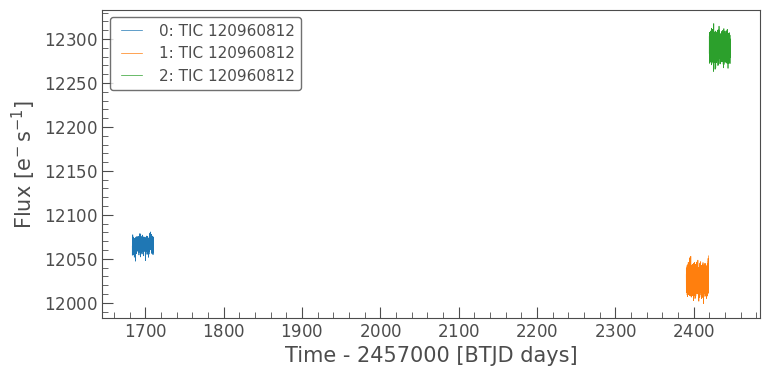

In [12]:
tlcc = tsr[ [0, 4, 6] ].download_all()
tlcc.plot()

Now the flux of these light curves from TESS Sector 14, 40, and 41 should each be normalised to a value 1 (or 100% Kepler-25's starlight) and appended into one single TESS light curve (tlc) next. Both of these tasks can be done with a single command, which is the [`.stitch`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurveCollection.stitch.html) function.  
Because in this tutorial the data set from TESS is going to be compared with the Kepler data set, the time format on the x-axis is going to be changed from Barycentric TESS Julian Dates (BTJD) to generic barycentric Julian Dates (JD) and this data set from TESS will also be depicted in plots as circular dots with error bars in blue colorisation from now on:

<AxesSubplot:xlabel='Time [JD]', ylabel='Normalized Flux'>

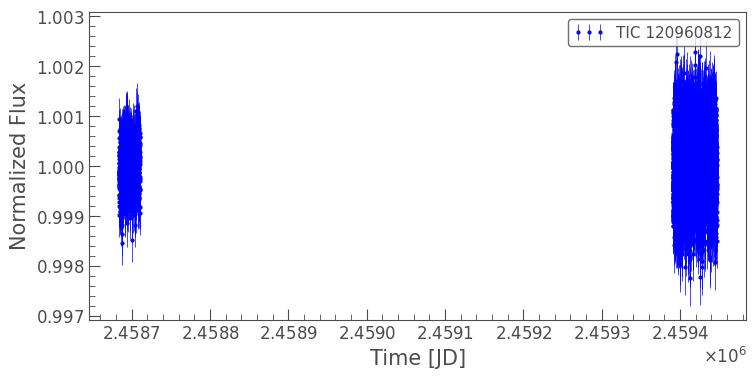

In [13]:
tlc = tlcc.stitch()
tlc.time.format = 'jd'
tlc.errorbar(color = 'blue',
             marker = 'o'
            )

The difference in light curve quality between Sector 14's 1800 seconds exposure time (around 2458700th Julian day) and Sector 40 & 41's 600 seconds exposure times (around 2459400th Julian day) is visibly noticeable in the above normalised flux plot.  
Can this light curve generate a TESS periodogram (tpg) showing the Kepler-25c's 12.72 days periodicity via the [`.to_periodogram`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.to_periodogram.html) function using the [**Box Least Square**](https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html#2.-The-Box-Least-Squares-Method-for-Finding-Transiting-Planets) ('bls') method?  
**NOTE:** this computation might take a second.

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

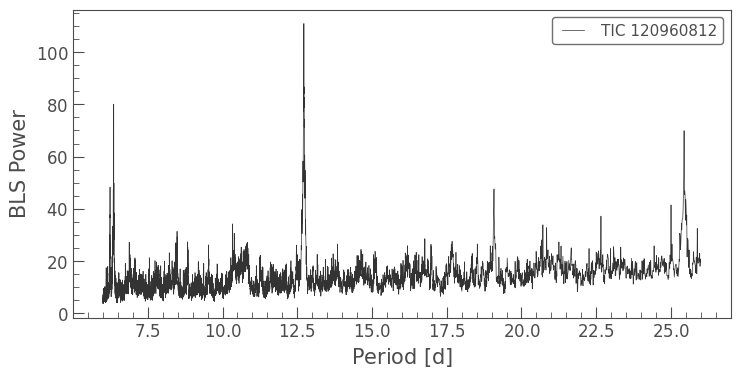

In [14]:
tpg = tlc.to_periodogram(method = 'bls',
                         frequency_factor = 200,
                         minimum_period = 6,
                         maximum_period = 26
                        )
tpg.plot()

This is not a pretty periodogram, but the plot above does show the largest peak right after the 12.5 days Period mark on the x-axis.  
This can be further investigated with the [`.find_peaks`](/reference/api/lightkurve.periodogram.Periodogram.find_peaks.html) function. Because there is a lot of noise, a  QTable shall be created of all the TESS periodogram's found peaks (tfp), that stick out above the 40 BLS Power mark on the y-axis of the above plot:

In [15]:
tfp = tpg.find_peaks(40)
tfp

periodicity,power,prominence,lower_hwhm,upper_hwhm,fwhm,periodicity_peak_top_peak_ratio
d,,,d,d,d,
float64,float64,float64,float64,float64,float64,float64
12.721315613817495,110.9,104.4,0.019527,0.021046,0.040573,1.000
6.360357687924234,80.1,76.0,0.0040513,0.0018776,0.0059289,0.500
...,...,...,...,...,...,...
6.363137088371641,44.5,3.3,0.0002067,0.00050702,0.00071372,0.500
6.349264324472178,40.3,3.0,0.00034603,0.00041286,0.00075889,0.499
6.357580714485368,49.6,1.5,0.00064778,0.00034701,0.00099479,0.500


The first row of the 'tfp' QTable shows the peak with the largest prominence, which has a periodicity of $12.7213_{-0.0195}^{+0.0210}$ days.  
This TESS periodicity peak (tpp) can be plotted in more detail by extracting the values from the 'tfp' QTable cells using the $ QTable \ name [\, 'Column \ name' ]\, [\, Row \ index \ number ]\, $ selection method.

(12.62367830351749, 12.826544926272444)

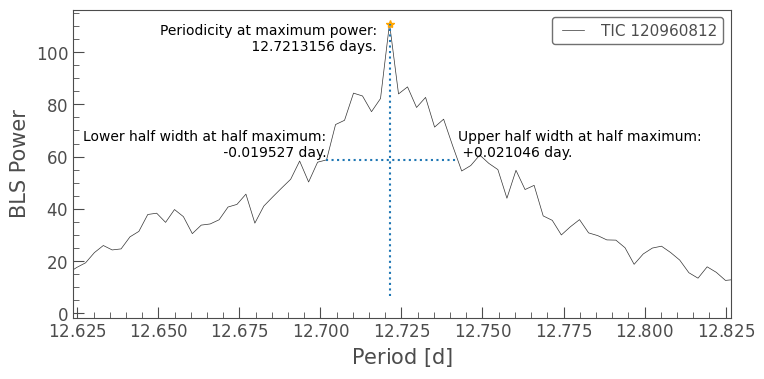

In [16]:
pwrT = tfp['power'][0].value
prdT = tfp['periodicity'][0].value
prmT = tfp['prominence'][0].value
lwrT = tfp['lower_hwhm'][0].value
uprT = tfp['upper_hwhm'][0].value

tpp = tpg.plot()
tpp.plot(prdT,
         pwrT,
         '*',
         color = 'orange'
        )
tpp.hlines(y = pwrT-prmT/2,
           xmin = prdT-lwrT,
           xmax = prdT+uprT,
           ls = ':'
          )
tpp.vlines(x = prdT,
           ymin = pwrT-prmT,
           ymax = pwrT,
           ls = ':'
          )
tpp.text(prdT-lwrT/5,
         pwrT,
         f'Periodicity at maximum power:\n {prdT:.9g} days.',
         ha = 'right',
         va = 'top'
        )
tpp.text(prdT-lwrT,
         pwrT-prmT/2,
         f'Lower half width at half maximum:\n {-lwrT:.5g} day.',
         ha = 'right',
         va = 'bottom'
        )
tpp.text(prdT+uprT,
         pwrT-prmT/2,
         f'Upper half width at half maximum:\n {uprT:+.5g} day.',
         ha = 'left',
         va = 'bottom'
        )
tpp.set_xlim(prdT-5*lwrT, prdT+5*uprT)

Again, this is not a pretty periodicity peak, but it does the job at least.  
More data can be extracted from the periodogram by calculating the TESS computed statistics (tcs) with the [`.compute_stats`](https://docs.lightkurve.org/reference/api/lightkurve.periodogram.BoxLeastSquaresPeriodogram.compute_stats.html) function, and finding out how large Kepler-25c's planetary disc area is in comparison to the area of Kepler-25's stellar disc.

In [17]:
tcs = tpg.compute_stats()
tcs

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


{'transit_times': <Time object: scale='tdb' format='jd' value=[2458687.6686569  2458700.38997252 2458713.11128813 2458725.83260374
  2458738.55391936 2458751.27523497 2458763.99655059 2458776.7178662
  2458789.43918181 2458802.16049743 2458814.88181304 2458827.60312865
  2458840.32444427 2458853.04575988 2458865.7670755  2458878.48839111
  2458891.20970672 2458903.93102234 2458916.65233795 2458929.37365357
  2458942.09496918 2458954.81628479 2458967.53760041 2458980.25891602
  2458992.98023163 2459005.70154725 2459018.42286286 2459031.14417848
  2459043.86549409 2459056.5868097  2459069.30812532 2459082.02944093
  2459094.75075654 2459107.47207216 2459120.19338777 2459132.91470339
  2459145.636019   2459158.35733461 2459171.07865023 2459183.79996584
  2459196.52128146 2459209.24259707 2459221.96391268 2459234.6852283
  2459247.40654391 2459260.12785952 2459272.84917514 2459285.57049075
  2459298.29180637 2459311.01312198 2459323.73443759 2459336.45575321
  2459349.17706882 2459361.8983

The 'tcs' output gives a transit depth of $0.0968 \pm 0.0065 \% $ and the conclusion that can be made, is that the TESS space telescope could have found this near-twin ice giant exoplanet, if the Kepler space telescope had not discovered it first.  
Before moving on to the next analysis of the Kepler data, this TESS data analysis will be finalised with a TESS folded light curve (tflc) plot through the [`.fold`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.fold.html) function:

(-1.0, 1.0)

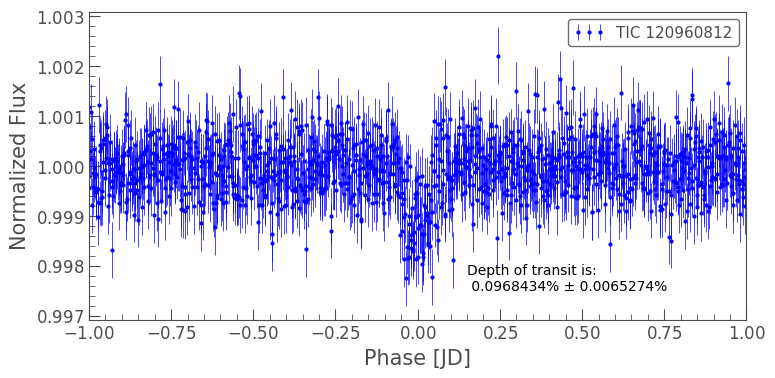

In [18]:
tflc = tlc.fold(epoch_time = tpg.transit_time_at_max_power,
                period = tpg.period_at_max_power
               ).errorbar(marker = 'o',
                          color = 'blue'
                         )

tdepth = tcs['depth'][0]
tderror = tcs['depth'][1]

tflc.annotate(f'Depth of transit is:\n {tdepth:.7%} ± {tderror:.7%}',
              xy = [0.15, 0.9975]
             )
tflc.set_xlim(-1, 1)

## 3. Kepler light curve analysis

Because this is a comparison between the observational data from the Kepler space telescope and the observational data from the TESS space telescope, everything that has been done in the TESS data analysis has to be repeated in a similar manner here.  
Starting with the refined light curve search, the mission option can easily be changed from 'TESS' to 'Kepler'.

In [19]:
kepler_search_result = lk.search_lightcurve('Kepler-25',
                                            mission = 'Kepler',
                                            cadence = 'long'
                                           )
kepler_search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr004349452,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr004349452,0.0
2,Kepler Quarter 01,2009,Kepler,1800,kplr004349442,0.0
...,...,...,...,...,...,...
32,Kepler Quarter 16,2013,Kepler,1800,kplr004349452,0.0
33,Kepler Quarter 17,2013,Kepler,1800,kplr004349442,0.0
34,Kepler Quarter 17,2013,Kepler,1800,kplr004349452,0.0


And here a problem is already occurring, since this search result produced double Kepler Quarters (Kepler's equivalence to TESS's Sectors). When looking at the values in the names of the 'target_name' column in the above table, there is one number ending with 52 and another number ending with 42. So which number is the correct one?  

The previously created 'ntig' table might have some answers, whose cell with Kepler-25c's host star's alternate names can be recalled, like so:

In [20]:
ntig['star_alternate_names'][ntig['name'] == 'Kepler-25 c'][0]

'2MASS J19063321+3929164, GSC 03124-01264, KIC 4349452, KOI-244, Kepler-25 A, TYC 3124-01264-1, WISE J190633.20+392916.5'

One of the above alternative names is 'Kepler-25 A', which indicates that the Kepler-25 star system is most likely a binary and there is probably a fainter 'Kepler-25 B' companion star in this star system.  

So why didn't this issue arise in the TESS data analysis? 
>! The TESS space telescope uses wide-field-of-view cameras, whose pixels cover a lot of night sky area. The Kepler space telescope observed a much narrower field, hence every pixel would be covering far less night sky area. So this Kepler space telescope should therefore be more capable of separating the stars in a binary, like for example here in the Kepler-25 star system.  

Looking at the Kepler Input Catalogue (KIC) designation in the above star alternate names output, we see that this number is identical to one of the two numbers in the 'target_name' column of our previous light curve search result table. This KIC designation can be copied and pasted over the initial faulty 'Kepler-25' target name and a new Kepler search result (ksr) table can be generated:

In [21]:
ksr = lk.search_lightcurve('KIC 4349452',
                           mission = 'Kepler',
                           cadence = 'long'
                          )
ksr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr004349452,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr004349452,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr004349452,0.0
...,...,...,...,...,...,...
15,Kepler Quarter 15,2013,Kepler,1800,kplr004349452,0.0
16,Kepler Quarter 16,2013,Kepler,1800,kplr004349452,0.0
17,Kepler Quarter 17,2013,Kepler,1800,kplr004349452,0.0


This sequence of light curves can be downloaded into a Kepler light curve collection (klcc) using the $ Table \ name [\, Row \ starting \ index \ number \ : \ Row \ ending \ index \ number ]\, $ selection method:

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

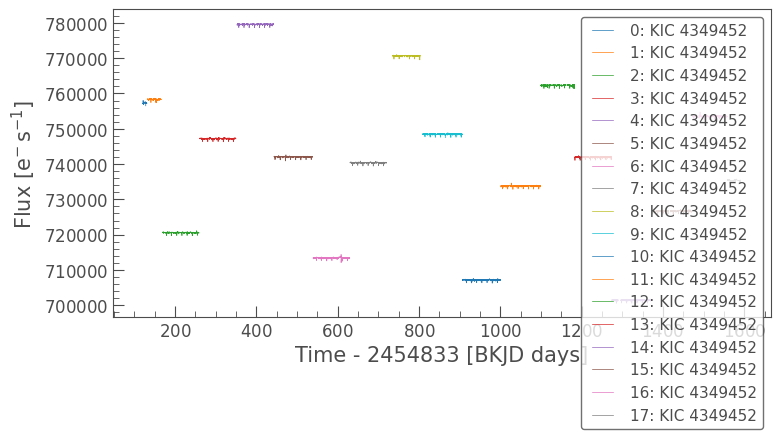

In [22]:
klcc = ksr[0:18].download_all()
klcc.plot()

And just like in the TESS light curve analysis these light curves can be stitched into a single Kepler light curve (klc), whose Barycentric Kepler Julian Dates (BKJD) time format shall be changed into the generic barycentric Julian Dates (JD) as well:

<AxesSubplot:xlabel='Time [JD]', ylabel='Normalized Flux'>

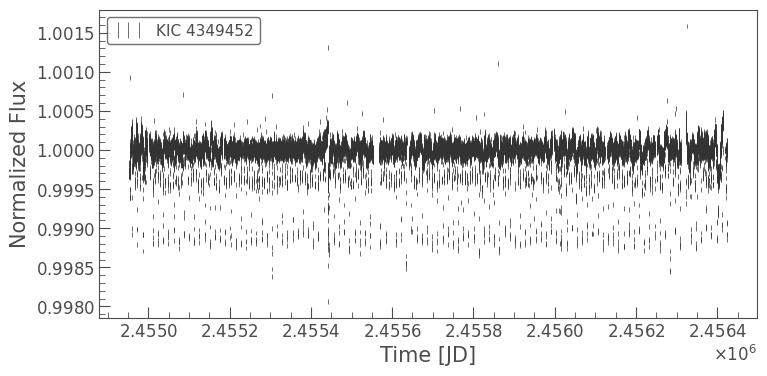

In [23]:
klc = klcc.stitch()
klc.time.format = 'jd'
klc.errorbar()

The Kepler-25c's transits can already be observed underneath Kepler-25 A's main light curve in this data set. No marker was used for this data set, because it would completely cover up its tiny error bars. Feel free to add a marker from the list of all possible [**MatPlotLib Markers**](https://matplotlib.org/stable/api/markers_api.html) if desired.  

This single light curve can now be computed into a Kepler periodogram (kpg) with the exact same settings from the TESS data analysis.  
**NOTE:** because this light curve spans nearly five years of observational data, the computation can take a minute.

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

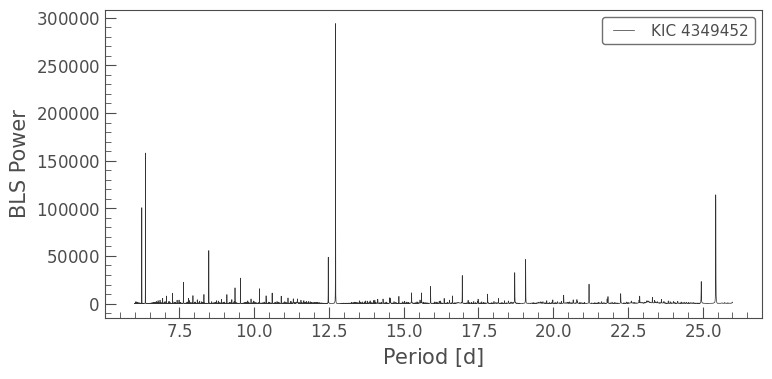

In [24]:
kpg = klc.to_periodogram(method = 'bls',
                         frequency_factor = 200,
                         minimum_period = 6,
                         maximum_period = 26
                        )
kpg.plot()

Now this is what a proper periodogram should look like!  
A Kepler found peak (kpl) QTable can be created with the [`.find_peaks`](/reference/api/lightkurve.periodogram.Periodogram.find_peaks.html) function, which will search for peaks sticking out above 5% of the maximum BLS Power by default. Large tables can be browsed with the [`.show_in_notebook`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.show_in_notebook) function, which might not work if you are not using a notebook app in a browser with internet access, since support of online javascript code repositories from the [**datatables.net**](https://datatables.net/) website is required for this command. Therefore please use this function with caution or perhaps the [`.more`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.more) and [`.show_in_browser`](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.show_in_browser) functions might be better alternatives.

In [25]:
kfp = kpg.find_peaks()
kfp.show_in_notebook()

idx,periodicity,power,prominence,lower_hwhm,upper_hwhm,fwhm,periodicity_peak_top_peak_ratio
,d,,,d,d,d,
0,12.720178627733771,293784.0,293718.6,0.0013361,0.0016358,0.0029718,1.000
1,6.36021190597929,157935.4,157897.9,0.00074555,0.00066908,0.0014146,0.500
2,25.439376575276782,114121.8,113906.6,0.0029567,0.0056377,0.0085945,2.000
3,6.238548246660667,100590.5,100549.5,0.00099352,0.0009868,0.0019803,0.490
4,8.48022805522229,55629.9,55591.6,0.00090784,0.00098109,0.0018889,0.667
5,12.477220585314488,48686.3,48610.0,0.0021416,0.0019153,0.0040568,0.981
6,19.079900179440838,46311.2,46221.5,0.0023495,0.0032481,0.0055977,1.500
7,18.714937071858444,32464.8,32349.3,0.0032177,0.0042432,0.0074609,1.471
8,16.960685404766057,29486.4,29387.5,0.002179,0.001803,0.0039821,1.333


The 'bls' method will always create multiple peaks in the periodogram from the same exoplanet transits, hence their peak ratios should be very close to whole fractions. The last 'periodicity_peak_top_peak_ratio' column of this 'kfp' QTable should therefore be read vertically from top to bottom as:  
1/1, 1/2, 2/1, 0.490, 2/3, 0.981, 3/2, 1.471, 4/3, 3/4, 1.962, 3/5, 5/3, 5/4, 0.736, 4/5  

The 4th, 6th, 8th, 11th, and 15th peak ratios cannot be turned into reasonable whole fractions, which means they might belong to another transiting exoplanet in the Kepler-25A star system.  

For visual learners this is perhaps better explained by labelling the periodogram's peaks with all their peak ratios from the 'kpf' QTable:

(-14651.244987264281, 308471.41852390306)

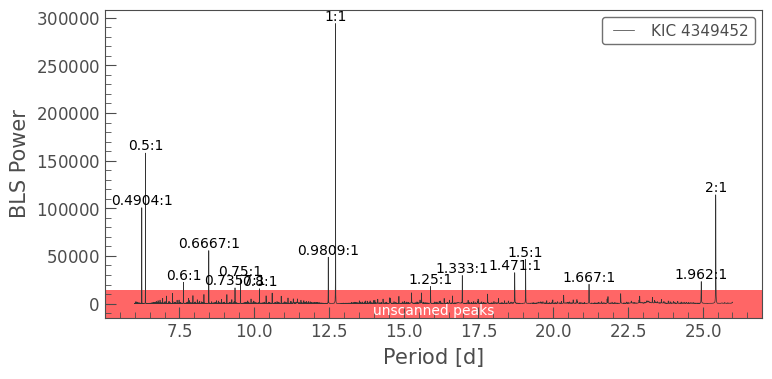

In [26]:
kfpp = kpg.plot()
x_range = kfpp.get_xlim()
y_range = kfpp.get_ylim()

for i in range( len(kfp) ):
    ratio = kfp['periodicity_peak_top_peak_ratio'][i]
    kfpp.text(kfp['periodicity'][i].value,
              kfp['power'][i].value,
              f'{ratio:.4g}:1',
              ha = 'center',
              va = 'bottom'
             )

kfpp.text(16,
          y_range[0],
          'unscanned peaks',
          color = 'white',
          ha = 'center',
          va = 'bottom'
         )
kfpp.fill_between(x_range,
                  y_range[0],
                  y2 = 0.05 * kpg.max_power.value,
                  facecolor = 'red',
                  alpha = 0.6
                 )
kfpp.set_xlim(x_range[0], x_range[1])
kfpp.set_ylim(y_range[0], y_range[1])

Can those five before mentioned unreasonable peak ratios be located by eye alone in the graph here above?  
These five unreasonable peak ratios could also be related to each other. This can be revealed when the 4th peak is made the top peak in a new [`.find_peaks`](/reference/api/lightkurve.periodogram.Periodogram.find_peaks.html) QTable.  

That can easily be done by scanning the periodogram for peaks again, but this time with a lower BLS Power y-axis value limit from the 'kpg' plot and an upper BLS Power y-axis value limit from the last 'kfp' QTable. Since more than one value will be used, an array shall be required, hence those extra square brackets again:

In [27]:
lower_y_limit = 0.05 * kpg.max_power.value
upper_y_limit = kfp['power'][2].value - 0.1

kfp_b = kpg.find_peaks( [lower_y_limit, upper_y_limit] )
kfp_b.show_in_notebook()

idx,periodicity,power,prominence,lower_hwhm,upper_hwhm,fwhm,periodicity_peak_top_peak_ratio
,d,,,d,d,d,
0,6.238548246660667,100590.5,100549.5,0.00099352,0.0009868,0.0019803,1.000
1,8.48022805522229,55629.9,55591.6,0.00090784,0.00098109,0.0018889,1.359
2,12.477220585314488,48686.3,48610.0,0.0021416,0.0019153,0.0040568,2.000
3,19.079900179440838,46311.2,46221.5,0.0023495,0.0032481,0.0055977,3.058
4,18.714937071858444,32464.8,32349.3,0.0032177,0.0042432,0.0074609,3.000
5,16.960685404766057,29486.4,29387.5,0.002179,0.001803,0.0039821,2.719
6,9.540225913998519,26779.3,26729.1,0.00097076,0.0010818,0.0020526,1.529
7,24.954937553411888,23135.4,22985.1,0.0053845,0.0041284,0.009513,4.000
8,7.632224864614479,22421.7,22378.6,0.00089363,0.00083131,0.0017249,1.223


In this QTable the old 4th, 6th, 8th, 11th, and 15th peak are now respectively the 1st, 3rd, 5th, 8th, and 12th peak and those new 'periodicity_peak_top_peak_ratio' column cells have now been respectively calculated as the whole fractions of:  
1/1, 2/1, 3/1, 4/1, 3/2  

What has been done in the above QTable, can also be visualised in a graph again:

(-14651.244987264281, 308471.41852390306)

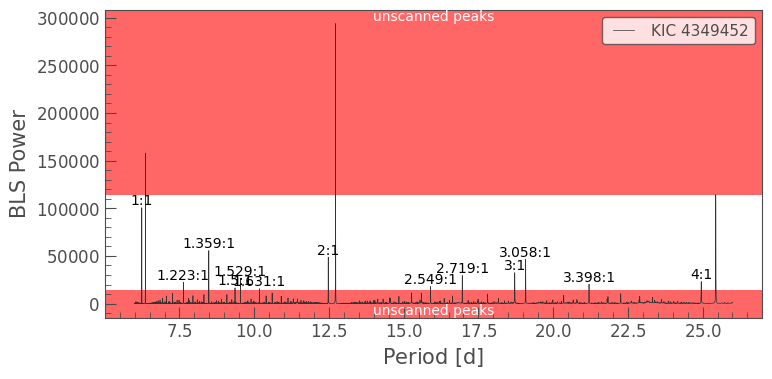

In [28]:
kfpp_b = kpg.plot()
xrange = kfpp_b.get_xlim()
yrange = kfpp_b.get_ylim()

for j in range( len(kfp_b) ):
    ratio_b = kfp_b['periodicity_peak_top_peak_ratio'][j]
    kfpp_b.text(kfp_b['periodicity'][j].value,
                kfp_b['power'][j].value,
                f'{ratio_b:.4g}:1',
                ha = 'center',
                va = 'bottom'
               )

kfpp_b.text(16,
            yrange[1],
            'unscanned peaks',
            color = 'white',
            ha = 'center',
            va = 'top'
           )
kfpp_b.fill_between(xrange,
                    upper_y_limit,
                    y2 = yrange[1],
                    facecolor = 'red',
                    alpha = 0.6
                   )
kfpp_b.text(16,
            yrange[0],
            'unscanned peaks',
            color = 'white',
            ha = 'center',
            va = 'bottom'
           )
kfpp_b.fill_between(xrange,
                    yrange[0],
                    y2 = lower_y_limit,
                    facecolor = 'red',
                    alpha = 0.6
                   )
kfpp_b.set_xlim(xrange[0], xrange[1])
kfpp_b.set_ylim(yrange[0], yrange[1])

This second ratio-labelled graph here above shows the previous five unreasonable ratios have changed into now very reasonable ratios and vice versa. Therefore it can be concluded that those peaks are indeed related to each other and the Kepler-25 A star might have another transiting exoplanet.  

The previously created 'exo' QTable could have that exoplanet listed, so why not list all the exoplanet names starting with Kepler-25

In [29]:
exo[ (exo['name'] > 'Kepler-25') & (exo['name'] < 'Kepler-26') ]

name,mass,radius,orbital_period,mag_v,star_alternate_names
,geoMass,Rgeo,d,mag,
object,float64,float64,float64,float64,object
Kepler-25 b,8.7403,2.7462,6.238297,11.0,"2MASS J19063321+3929164, GSC 03124-01264, KIC 4349452, KOI-244, Kepler-25 A, TYC 3124-01264-1, WISE J190633.20+392916.5"
Kepler-25 c,15.224,5.2122,12.7207,11.0,"2MASS J19063321+3929164, GSC 03124-01264, KIC 4349452, KOI-244, Kepler-25 A, TYC 3124-01264-1, WISE J190633.20+392916.5"
...,...,...,...,...,...
Kepler-258 c,———,3.6093,33.653079,———,"2MASS J19361643+4634455, KIC 9775938, KOI-951, WISE J193616.42+463444.9"
Kepler-259 b,———,2.8022,8.115317,———,"2MASS J19125086+4636540, KIC 9823457, KOI-954, WISE J191250.86+463654.1"
Kepler-259 c,———,2.7014,36.924931,———,"2MASS J19125086+4636540, KIC 9823457, KOI-954, WISE J191250.86+463654.1"


It would have been smarter to have listed exoplanet names from 'Kepler-25 a' to 'Kepler-25 z', since the above search result has also included all the Kepler-250s exoplanets because of the alphabetical sorting. Oh well, another lesson learned. However, on top of the list the Kepler-25 A system is found to indeed possess other planets in orbit and the Kepler-25b super-Earth exoplanet matches in periodicity with the largest peak in the 'kfp_b' QTable, so this mystery is solved now.  

Focusing back to the near-twin ice giant Kepler-25c, whose periodicity was found to be $12.7202_{-0.0013}^{+0.0016}$ days in the initial 'kfp' QTable, a plot should be made of the zoomed-in Kepler periodogram peak (kpp) just like how it was done in the TESS data analysis:

(12.713498349248304, 12.728357586585783)

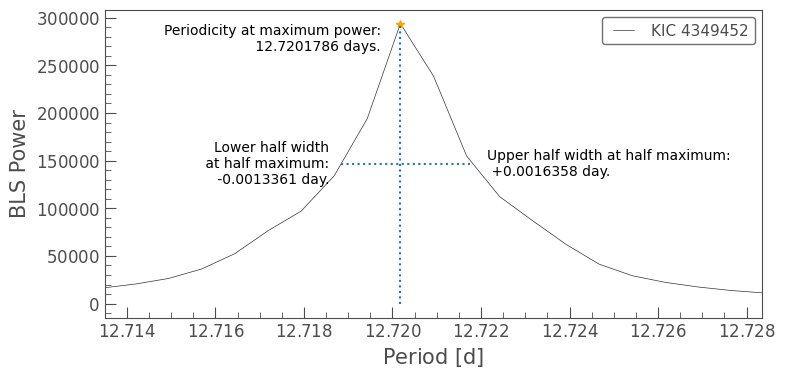

In [30]:
pwrK = kfp['power'][0].value
prdK = kfp['periodicity'][0].value
prmK = kfp['prominence'][0].value
lwrK = kfp['lower_hwhm'][0].value
uprK = kfp['upper_hwhm'][0].value

kpp = kpg.plot()
kpp.plot(prdK,
         pwrK,
         '*',
         color = 'orange'
        )
kpp.hlines(y = pwrK-prmK/2,
           xmin = prdK-lwrK,
           xmax = prdK+uprK,
           ls=':'
          )
kpp.vlines(x = prdK,
           ymin = pwrK-prmK,
           ymax = pwrK,
           ls = ':'
          )
kpp.text(prdK-lwrK/3,
         pwrK,
         f'Periodicity at maximum power:\n {prdK:.9g} days.',
         ha='right',
         va='top'
        )
kpp.text(prdK-1.2*lwrK,
         pwrK-prmK/2,
         f'Lower half width\n at half maximum:\n {-lwrK:.5g} day.',
         ha = 'right',
         va = 'center'
        )
kpp.text(prdK+1.2*uprK,
         pwrK-prmK/2,
         f'Upper half width at half maximum:\n {uprK:+.5g} day.',
         ha='left',
         va='center'
        )
kpp.set_xlim(prdK-5*lwrK, prdK+5*uprK)

Compared to the equivalent TESS graph, this plot of Kepler-25c's periodicity peak looks a lot cleaner.  

Continuing with the Kepler computed statistics (kcs) calculation, what would Kepler-25c's transit depth here be?

In [31]:
kcs = kpg.compute_stats()
kcs

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


{'transit_times': <Time object: scale='tdb' format='jd' value=[2454960.65955063 2454973.37972926 2454986.09990789 2454998.82008651
  2455011.54026514 2455024.26044377 2455036.9806224  2455049.70080102
  2455062.42097965 2455075.14115828 2455087.86133691 2455100.58151553
  2455113.30169416 2455126.02187279 2455138.74205142 2455151.46223005
  2455164.18240867 2455176.9025873  2455189.62276593 2455202.34294456
  2455215.06312318 2455227.78330181 2455240.50348044 2455253.22365907
  2455265.9438377  2455278.66401632 2455291.38419495 2455304.10437358
  2455316.82455221 2455329.54473083 2455342.26490946 2455354.98508809
  2455367.70526672 2455380.42544534 2455393.14562397 2455405.8658026
  2455418.58598123 2455431.30615986 2455444.02633848 2455456.74651711
  2455469.46669574 2455482.18687437 2455494.90705299 2455507.62723162
  2455520.34741025 2455533.06758888 2455545.78776751 2455558.50794613
  2455571.22812476 2455583.94830339 2455596.66848202 2455609.38866064
  2455622.10883927 2455634.829

Kepler-25c's transit depth in the 'kcs' output is $0.102042 \pm 0.000134 \% $, which is also significantly more precise and accurate than in the TESS computed stats.  
By putting that in perspective with a Kepler folded light curve (kflc) graph, this Kepler data analysis is going to be completed at long last:

(-1.0, 1.0)

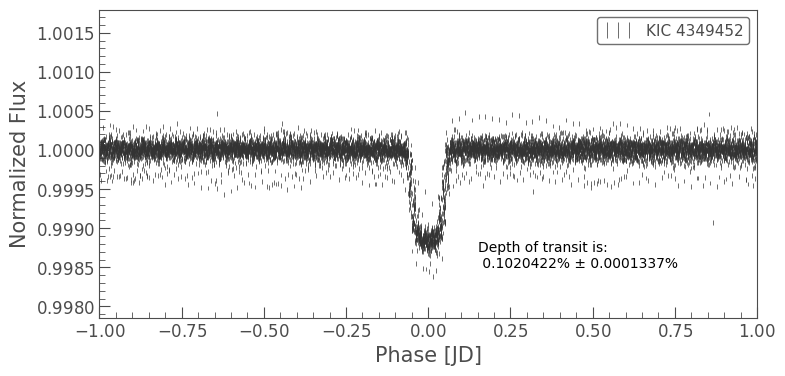

In [32]:
kflc = klc.fold(epoch_time = kpg.transit_time_at_max_power,
                period = kpg.period_at_max_power
               ).errorbar()
kdepth = kcs['depth'][0]
kderror = kcs['depth'][1]
kflc.annotate(f'Depth of transit is:\n {kdepth:.7%} ± {kderror:.7%}',
              xy = (0.15, 0.9985)
             )
kflc.set_xlim(-1, 1)

## 4. Combined light curve analysis

There are now two light curves of the Kepler-25 stellar system: the TESS light curve (tlc) and the Kepler light curve (klc).  
Lets plot these two light curves together to get an overview of what we have so far:

<AxesSubplot:xlabel='Time [JD]', ylabel='Normalized Flux'>

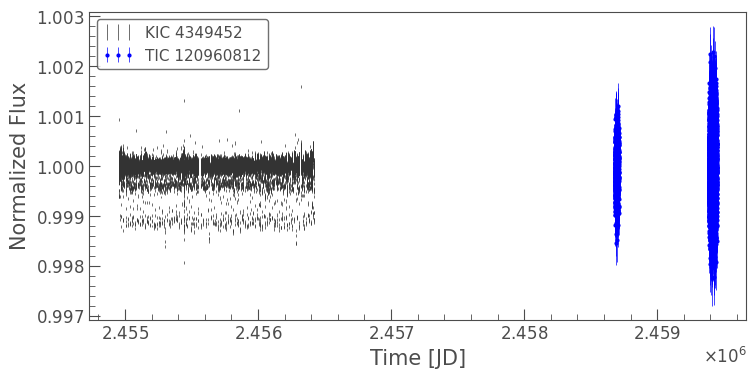

In [33]:
tlc.errorbar(ax = klc.errorbar(),
             color = 'blue',
             marker = 'o'
            )

Notice the differences in light curve quality of; five years of 1800 seconds exposure time in Kepler space telescope field-of-view observations from about the 2455000th Julian Day to about the 2456400th Julian Day, one month of 1800 seconds exposure time in TESS space telescope wide-field-of-view observations around the 2458700th Julian Day, and two months of 600 seconds exposure time in TESS space telescope wide-field-of-view observations around the 2459400th Julian Day.  

These two light curves can be combined into one single light curve (lc). Since both light curves are already normalised, the [`.append`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.append.html) function will be more suitable than the previously used [`.stitch`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurveCollection.stitch.html) command:

<AxesSubplot:xlabel='Time [JD]', ylabel='Normalized Flux'>

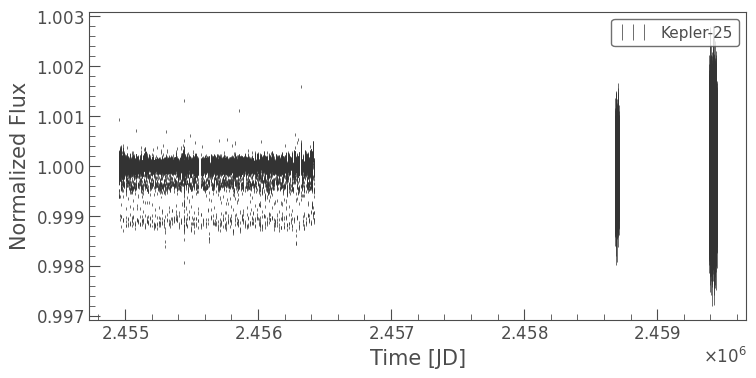

In [34]:
lc = klc.append(tlc)
lc.errorbar(label = 'Kepler-25')

And what will its periodogram (pg) produce with the exact same settings as in the previous two data analyses?  
**NOTE:** this computation took about five minutes to be completed in my Jupyter Notebook setup. It might therefore take a while depending on your Python program setup, so please grab a beverage, take a small break, or do something else while those data points are being evaluated.

`period` contains 258812 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

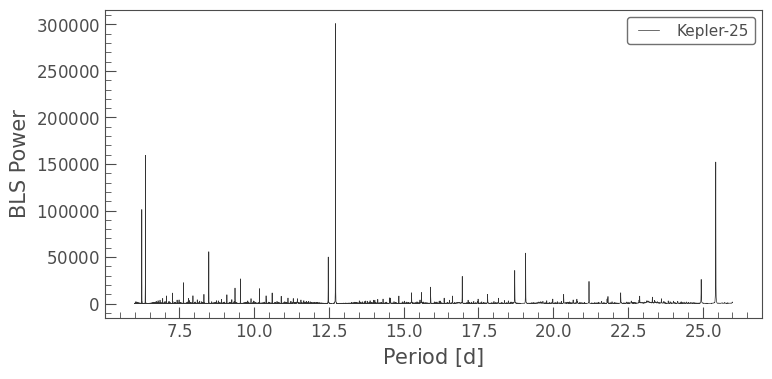

In [35]:
pg = lc.to_periodogram(method = 'bls',
                       frequency_factor = 200,
                       minimum_period = 6,
                       maximum_period = 26
                      )
pg.plot(label = 'Kepler-25')

This 'pg' plot looks almost identical to the 'kpg' plot from the Kepler data analysis.  
The found peaks (fp) QTable will provide all the exact periodicity values of the 'pg' peaks:

In [36]:
fp = pg.find_peaks()
fp

periodicity,power,prominence,lower_hwhm,upper_hwhm,fwhm,periodicity_peak_top_peak_ratio
d,,,d,d,d,
float64,float64,float64,float64,float64,float64,float64
12.720365377223185,300843.2,300787.4,0.0014026,0.0013787,0.0027813,1.000
6.360146471499116,159240.7,159206.2,0.00066896,0.00071727,0.0013862,0.500
...,...,...,...,...,...,...
15.900426849862814,17681.7,17566.3,0.0016101,0.0017614,0.0033716,1.250
9.357780878364935,16677.3,16622.2,0.0012468,0.0014441,0.0026909,0.736
10.176307596123344,16071.4,16012.6,0.0010781,0.0012714,0.0023496,0.800


The 'fp' QTable shows some differences here from the Kepler-only data analysis, such as a $12.7204_{-0.0014}^{+0.0014}$ days periodicity for Kepler-25c.  
This new periodicity peak (pp) can be depicted in a plot:

(12.71335253863731, 12.727259054248398)

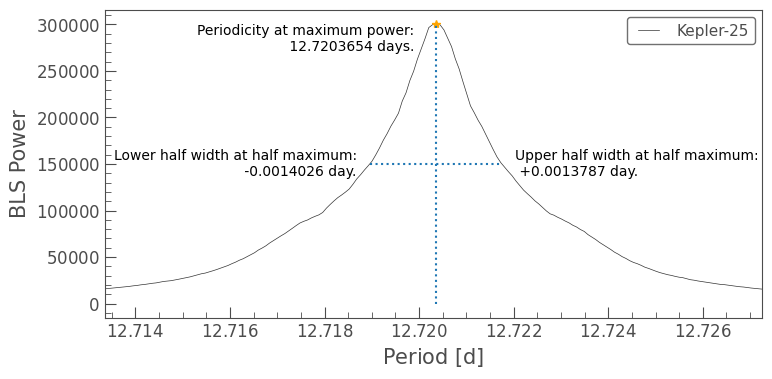

In [37]:
pwr = fp['power'][0].value
prd = fp['periodicity'][0].value
prm = fp['prominence'][0].value
lwr = fp['lower_hwhm'][0].value
upr = fp['upper_hwhm'][0].value

pp = pg.plot(label = 'Kepler-25')
pp.plot(prd,
        pwr,
        '*',
        color = 'orange'
       )
pp.hlines(y = pwr-prm/2,
          xmin = prd-lwr,
          xmax = prd+upr,
          ls=':'
         )
pp.vlines(x = prd,
          ymin = pwr-prm,
          ymax = pwr,
          ls = ':'
         )
pp.text(prd-lwr/3,
        pwr,
        f'Periodicity at maximum power:\n {prd:.9g} days.',
        ha='right',
        va='top'
       )
pp.text(prd-1.2*lwr,
        pwr-prm/2,
        f'Lower half width at half maximum:\n {-lwr:.5g} day.',
        ha = 'right',
        va = 'center'
       )
pp.text(prd+1.2*upr,
        pwr-prm/2,
        f'Upper half width at half maximum:\n {upr:+.5g} day.',
        ha='left',
        va='center'
       )
pp.set_xlim(prd-5*lwr, prd+5*upr)

This peak looks significantly more symmetrical than in the previous two analyses.  
The transit depth for the combined observational data can be calculated in the computed statistics (cs) too:

In [38]:
cs = pg.compute_stats()
cs

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


{'transit_times': <Time object: scale='tdb' format='jd' value=[2454960.64455063 2454973.36491601 2454986.08528138 2454998.80564676
  2455011.52601214 2455024.24637752 2455036.96674289 2455049.68710827
  2455062.40747365 2455075.12783902 2455087.8482044  2455100.56856978
  2455113.28893516 2455126.00930053 2455138.72966591 2455151.45003129
  2455164.17039667 2455176.89076204 2455189.61112742 2455202.3314928
  2455215.05185817 2455227.77222355 2455240.49258893 2455253.21295431
  2455265.93331968 2455278.65368506 2455291.37405044 2455304.09441581
  2455316.81478119 2455329.53514657 2455342.25551195 2455354.97587732
  2455367.6962427  2455380.41660808 2455393.13697346 2455405.85733883
  2455418.57770421 2455431.29806959 2455444.01843496 2455456.73880034
  2455469.45916572 2455482.1795311  2455494.89989647 2455507.62026185
  2455520.34062723 2455533.0609926  2455545.78135798 2455558.50172336
  2455571.22208874 2455583.94245411 2455596.66281949 2455609.38318487
  2455622.10355025 2455634.823

And for the combined data a transit depth of $0.103447 \pm 0.000134 \% $ has been computed.  
Now this combined data analysis can be completed with a graph of the folded light curve (flc) showing what the transit looks like for the combined data set:

(-1.0, 1.0)

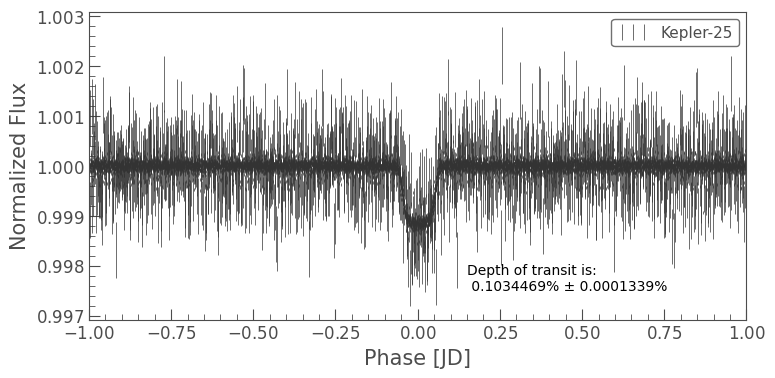

In [39]:
flc = lc.fold(epoch_time = pg.transit_time_at_max_power,
              period = pg.period_at_max_power
             ).errorbar(label = 'Kepler-25')
depth = cs['depth'][0]
derror = cs['depth'][1]
flc.annotate(f'Depth of transit is:\n {depth:.7%} ± {derror:.7%}',
             xy = (0.15, 0.9975)
            )
flc.set_xlim(-1, 1)

## 5. Discussion of the results

Before discussing the results, the uncertainties of the three periodicity values should be summarised first by taking the peak's full width at half maximum (fwhm) in the periodogram plot, the uncertainties of the three transit depth values from the computed statistics calculations, and show them in a small 'errors' [`QTable`](https://docs.astropy.org/en/stable/api/astropy.table.QTable.html) created from scratch:

In [40]:
std = ['TESS',
       'Kepler',
       'Combined'
      ]
fwhm = [tfp['fwhm'][0],
        kfp['fwhm'][0],
        fp['fwhm'][0]
       ]
tdu = [tcs['depth'][1],
       kcs['depth'][1],
       cs['depth'][1]
      ]
errors = QTable(data = [std, fwhm, tdu],
                names = ['space_telescope_data', 'periodicity_peak_fwhm', 'transit_depth_uncertainty']
               )
errors['transit_depth_uncertainty'] = errors['transit_depth_uncertainty'].to(u.pct)
errors['periodicity_peak_fwhm'].info.format = '.5f'
errors['transit_depth_uncertainty'].info.format = '.7f'
errors

space_telescope_data,periodicity_peak_fwhm,transit_depth_uncertainty
,d,%
str8,float64,float64
TESS,0.04057,0.0065274
Kepler,0.00297,0.0001337
Combined,0.00278,0.0001339


In the 'space_telescope_data' column, 'TESS' represents three months of observational data spanning a time of two years, 'Kepler' represents five years of almost uninterrupted observational data spanning therefore a time of five years, and the 'Combined' data set is the sum of the previously mentioned data sets spanning a total time of twelve years. Therefore it is no surprise the uncertainty in the 'periodicity_peak_fwhm' column reduces when more data is used, however, this is not the case in the 'transit_depth_uncertainty' column. In the above 'errors' QTable, the uncertainty of the transit depth first decreases significantly from the three months TESS-only observational data to the five years Kepler-only observational data as expected. But when three months of TESS observational data is combined with the five years of Kepler observational data, then the uncertainty of the transit depth increases slightly again! Why does this particular uncertainty of the transit depth do this?

Before answering that question, the last folded light curve from the combined observational data should be redone by zooming in and distinguishing the TESS data points with its color and marker from the other Kepler data points:

(-0.2, 0.2)

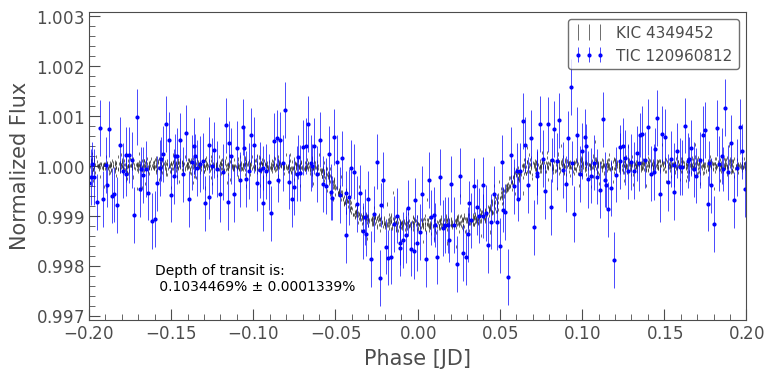

In [41]:
axflc = klc.fold(epoch_time = pg.transit_time_at_max_power,
                 period = pg.period_at_max_power
                ).errorbar()
ktflc = tlc.fold(epoch_time = pg.transit_time_at_max_power,
                 period = pg.period_at_max_power
                ).errorbar(ax = axflc,
                           marker = 'o',
                           color = 'blue',
                          )
ktflc.annotate(f'Depth of transit is:\n {depth:.7%} ± {derror:.7%}',
               xy = [-0.16, 0.9975]
              )
ktflc.set_xlim(-0.2, 0.2)

The apparent size of an exoplanet's radius can depend on many things. For example, observing a transit at a certain wavelength of light, which can be absorbed by certain atmospheric molecules of the exoplanet, can increase the transit depth and hence increase the exoplanet's visible radius. Comparing this to observing a transit at a different wavelength of light, which is not absorbed by the exoplanet's atmospheric molecules, the transit depth will be less deep and the exoplanet's visible radius will be smaller than before. This is the technique, which is used to determine the atmospheric composition of exoplanets by observing in specific infrared wavelengths with for example the James Webb space telescope. However, the Kepler and TESS space telescopes both observe in optical wavelengths, so the issue of different wavelengths might not really apply here. The TESS space telescope uses wide-field-of-view cameras, so its pixels are covering more night sky area than the pixels of Kepler space telescope observations. Hence this is why pixels from TESS observations contain more dim background stars and for Kepler-25 A's case: at least one binary companion, which is increasing the uncertainty of the TESS data quite a bit as shown in the above Kepler TESS folded light curves (ktflc) graph.  

For the periodicity, what statistically matters is when the 'Time'-values on the x-axis of the light curve change vertically. How much the 'Flux'-values on the y-axis of the light curve dip, does not matter a lot (like for example if a secondary exoplanet was transiting at the same time). This is why more data will almost always be better for the accuracy and precision of the periodicity statistics.  
For the transit depth statistics the 'Flux'-values on the y-axis of the light curve are critical. So not only should data be used from only a single source, the polluted transits (with the secondary exoplanet transits in them for example) should also be masked from the data set in order to obtain a more accurate transit depth overall. Therefore the transit depth data just needs to be a lot cleaner (and perhaps also flattened more).

The intention of the TESS space telescope mission was never to make follow-up observations of Kepler exoplanets. Instead the TESS space telescope is intended to be the first space telescope to detect an exoplanet transit, and some other narrow-field-of-view telescope should do the follow-up observations. This tutorial may have put the TESS space telescope in a bad spotlight, therefore the old 'ntig' QTable needs to be recalled and must show where the TESS space telescope really shines, by removing some 'Not a Number' (NaN) value rows and sorting this shorter QTable by apparent magnitude this time:

In [42]:
tess_vs_kepler = ntig[ (ntig['mag_v'].value < 25) & (ntig['radius'].value < 40) ]
tess_vs_kepler.sort('mag_v')
tess_vs_kepler

name,mass,radius,orbital_period,mag_v,star_alternate_names
,geoMass,Rgeo,d,mag,
object,float64,float64,float64,float64,object
HD 207897 b,15.891,2.505,16.202157,8.4,TOI-1611
HD 106315 c,15.199,4.3491,21.05704,9.0,"2MASS J12135339-0023365, BD+00 2910, EPIC 201437844, GSC 04940-00868, K2-109, SAO 138659, TYC 4940-868-1, WISE J121353.39-002336.4"
...,...,...,...,...,...
Kepler-177 c,14.7,8.7318,49.40926,15.0,"2MASS J19041131+4503115, KIC 8806123, KOI-523, WISE J190411.31+450311.5"
Kepler-66 b,14.938,2.8022,17.815815,15.3,"2MASS J19355557+4641158, KIC 9836149, KOI-1958, WISE J193555.58+464116.0"
Kepler-67 b,14.938,2.9368,15.7259,16.4,"2MASS J19363680+4609591, KIC 9532052, KOI-2115, WISE J193636.77+460958.8"


On top of this list is the Henry Draper (HD) catalogue number 207897 star or alternatively named TESS Object of Interest (TOI) number 1611, which has a transiting exoplanet in orbit that was first discovered by the TESS space telescope. The HD 207897 star has an apparent magnitude of $8.4 \ m_{V}$, which is a log scale measure of the number of photons received from a light source over a certain unit of time, where the magnitude difference changes by a factor of approximately $10^{0.4 \ \cdot \ \Delta m_{V}}$. This means that, by taking its difference with Kepler-25's apparent magnitude of $11 \ m_{V}$, HD 207897 emits $ \ \sim10^{0.4 \ \cdot \ 2.6} \approx \ $ ten times more photons every minute than the Kepler-25 stellar system. Hence exoplanet HD 207897 b requires a ten fold less precious James Webb space telescope time to obtain an equivalent Kepler-25 c infrared spectrum, constructed of numerous infrared photons from specific wavelengths revealing the atmospheric composition of the transiting exoplanet in orbit.  

At the bottom of the above list are several Kepler near-twin ice giant exoplanets orbiting stars with apparent magnitudes of about $16 \ m_{V}$. These dim stars emit roughly $ \ \sim10^{0.4 \ \cdot \ 5} \approx \ $ hundred times less photons every minute than the $11 \ m_{V}$ apparent magnitude Kepler-25 stellar system. These dim stars would therefore require a hundred fold more expensive space telescope time for follow-up observations to obtain a similar Kepler-25c result.  

What can be concluded is that in all its accuracy and precision the Kepler space telescope has actually found lots of exoplanets orbiting stars, which are simply too far away, too dim, and therefore too unsuitable for follow-up observations in the near future. Hindsight is of course always 20/20 and before the Kepler space telescope was launched, astronomers were not at all sure how many transiting exoplanets would be out there, although Kepler's observations have now been making great contributions in other fields of astronomy like asteroseismology. With this in mind the TESS space telescope is actually not a bad space telescope after all, when you take the requirements of its scientific mission in perspective. And the TESS mission is still ongoing, so the list of beneficial exoplanets discovered by the TESS space telescope should only grow more in number and the (b)right direction.

## About this Notebook

**Author:** W.A. van de Beek (Vvilhelmus@proton.me)

**Updated On:** 2023-02-23

## Citing Lightkurve and its Dependencies

If you use `lightkurve` or its dependencies for published research, please cite the authors. Click the buttons below to copy BibTeX entries to your clipboard.

In [43]:
lk.show_citation_instructions()

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>